In [8]:
import pandas as pd
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras import applications
from keras.layers import Activation, Dropout, Flatten, Dense,GlobalAveragePooling2D, BatchNormalization
import visualkeras

In [2]:
labels_csv = pd.read_csv('labels.csv')
labels_csv["id"] = [fname + ".jpg" for fname in labels_csv["id"]]
data_train = pathlib.Path('train')
data_test = pathlib.Path('test')

In [3]:
batch_size = 16
img_size = 224

In [4]:
datagen = ImageDataGenerator(preprocessing_function = keras.applications.resnet50.preprocess_input, validation_split=0.2)
train_generator = datagen.flow_from_dataframe(
                        dataframe = labels_csv,
                        directory = data_train,
                        subset="training",
                        x_col="id",
                        y_col="breed",
                        batch_size=batch_size,
                        shuffle=True,
                        class_mode="sparse",
                        color_mode="rgb",
                        target_size=(img_size, img_size))

validation_generator = datagen.flow_from_dataframe(
                        dataframe = labels_csv,
                        directory = data_train,
                        subset="validation",
                        x_col="id",
                        y_col="breed",
                        batch_size=batch_size,
                        shuffle=True,
                        class_mode="sparse",
                        color_mode="rgb",
                        target_size=(img_size, img_size))

Found 8178 validated image filenames belonging to 120 classes.
Found 2044 validated image filenames belonging to 120 classes.


In [11]:
resnet50 = keras.applications.ResNet50(include_top=False, weights='imagenet',input_shape=(224,224,3))

for layer in resnet50.layers:
    layer.trainable=False

model = Sequential()
model.add(resnet50)
model.add(BatchNormalization())
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.5))
model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(120, activation='softmax'))
model.summary()

optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 batch_normalization_2 (Batc  (None, 7, 7, 2048)       8192      
 hNormalization)                                                 
                                                                 
 global_average_pooling2d_2   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_4 (Dropout)         (None, 2048)              0         
                                                                 
 dense_4 (Dense)             (None, 2048)              4196352   
                                                                 
 dropout_5 (Dropout)         (None, 2048)             

In [6]:
history_res = model.fit(train_generator, epochs=20, verbose = 1,
                       validation_data=validation_generator)

Epoch 1/20
512/512 [==============================] - 26s 39ms/step - loss: 3.6041 - accuracy: 0.2564 - val_loss: 2.1087 - val_accuracy: 0.6101
Epoch 2/20
512/512 [==============================] - 19s 37ms/step - loss: 1.8341 - accuracy: 0.5921 - val_loss: 1.2367 - val_accuracy: 0.7065
Epoch 3/20
512/512 [==============================] - 19s 37ms/step - loss: 1.2136 - accuracy: 0.6903 - val_loss: 0.9880 - val_accuracy: 0.7358
Epoch 4/20
512/512 [==============================] - 19s 36ms/step - loss: 0.9569 - accuracy: 0.7441 - val_loss: 0.8869 - val_accuracy: 0.7456
Epoch 5/20
512/512 [==============================] - 19s 36ms/step - loss: 0.7977 - accuracy: 0.7826 - val_loss: 0.8325 - val_accuracy: 0.7510
Epoch 6/20
512/512 [==============================] - 19s 36ms/step - loss: 0.7087 - accuracy: 0.7982 - val_loss: 0.8079 - val_accuracy: 0.7544
Epoch 7/20
512/512 [==============================] - 19s 37ms/step - loss: 0.6106 - accuracy: 0.8256 - val_loss: 0.8014 - val_accuracy:

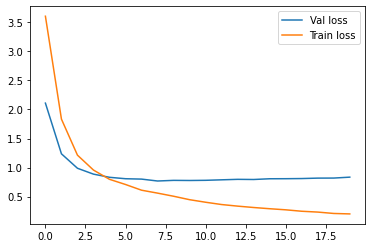

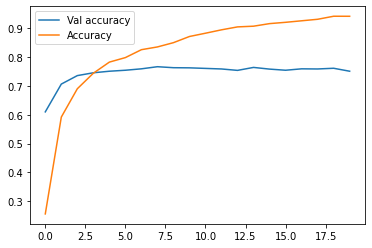

In [7]:
plt.figure()
plt.plot(history_res .history["val_loss"], label = "Val loss")
plt.plot(history_res .history["loss"], label = "Train loss")
plt.legend()
plt.show()
plt.figure()
plt.plot(history_res .history["val_accuracy"], label = "Val accuracy")
plt.plot(history_res .history["accuracy"], label = "Accuracy")
plt.legend()
plt.show()

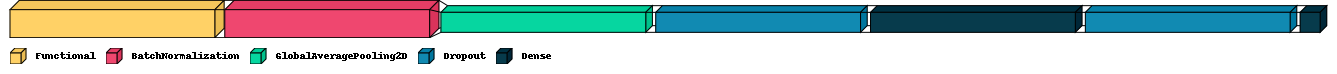

In [9]:
visualkeras.layered_view(model,  legend=True)